(2, 1)


[array([-0.00288957])]

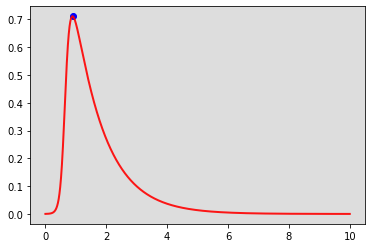

In [95]:
from scipy.optimize import minimize
%matplotlib inline
from scipy.integrate import odeint, solve_ivp
import pandas as pd
import numpy as np

N_pop=331002647

C=pd.read_excel(r".\contact\usaM.xlsx")
D=C.to_numpy()
C=pd.read_excel(r".\contact\agdist.xlsx")
N=C.to_numpy()
N_total=N_pop*N

D=np.array([[1,1],[2,2]]).reshape(2,2)
N=np.array([0.6,0.4]).reshape(2,1)

gamma=1.
beta=10.
epsilon=0.1
k=len(N)
v=0.1
i0=np.zeros((k,1))+0.0001
v0=np.zeros((k,1))
#nt=600
t_span=np.array([0,10])
times=np.linspace(t_span[0],t_span[1],7200)



def deriv( t,y,  beta, gamma,epsilon,D):
    #print(beta)
    S=(np.array(y[0:k])).reshape(k,1)
    V=(np.array(y[k:2*k])).reshape(k,1)
    I=(np.array(y[2*k:3*k])).reshape(k,1)
    dSdt = -beta*S* D.dot(I) 
    dVdt = -epsilon*V*beta*D.dot(I)
    dIdt = beta*(S+epsilon*V)*D.dot(I) - gamma * I
    x=np.vstack((dSdt,dVdt,dIdt))
    x=[item for sublist in x for item in sublist]
    return x
def func(v,beta, gamma,epsilon,D):
    v0=np.array(v).reshape(k,1)
    s0=N-i0-v0
    y0 =np.vstack((s0,v0,i0))
    y0 = [item for sublist in y0 for item in sublist]
    ret = solve_ivp(deriv, t_span, y0,t_eval=times,args=[beta,gamma,epsilon,D],rtol = 1e-10, atol = 1e-10)   
    #print(ret.y.shape)
    #Imax=max((sum(ret.y.T[2*k:3*k,:])).reshape(nt,1))
    ind=np.argmax(sum(ret.y[2*k:3*k,:]))
    S=(ret.y[0:k,ind]).reshape(k,1)
    V=ret.y[k:2*k,ind].reshape(k,1)
    I=ret.y[2*k:3*k,ind].reshape(k,1)
    print(V.shape)
    loss=sum(beta*(S+epsilon*V)*D.dot(I) - gamma * I)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    ax.plot(times, sum(ret.y[2*k:3*k,:]), 'r', alpha=0.9, lw=2, label='Infected')
    plt.scatter(times[ind], sum(I),color='b')
    #plt.scatter(times[ind-1], sum(ret.y[2*k:3*k,ind-1]),color='b')
    return [loss]
func(v0*0.5,beta,gamma,epsilon,D)